In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime,date
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# loading the files

tran = pd.read_csv('Clean_Transactions.csv')
ccd = pd.read_csv('Clean_CustomerDemographic.csv')
cca = pd.read_csv('Clean_CustomerAddress.csv')
cncl = pd.read_csv('Clean_NewCustomerList.csv')

In [4]:
tran.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [5]:
tran.shape

(19803, 13)

In [6]:
ccd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63
3,4,Talbot,None,Male,33,1961-10-03,Not Provided,IT,Mass Customer,N,No,7.0,56
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Not Provided,Affluent Customer,N,Yes,8.0,40


In [7]:
ccd.shape

(3912, 13)

Merging the transaction sheet and customer demographics sheet on customer id to get a complete sheet with transaction details of all the customers.

In [8]:
merge_trcd = pd.merge(tran, ccd, how = 'inner', left_on = 'customer_id', right_on = 'customer_id',)

In [10]:
merge_trcd['profit'] = merge_trcd['list_price'] - merge_trcd['standard_cost']

In [11]:
merge_trcd.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62,17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62,448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62,179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,38,1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,38,451.65


In [12]:
merge_trcd.shape

(19354, 26)

In [13]:
merge_trcd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

The data types of transaction_date and product_first_sold_date columns are not in date time format. So, we change the data type.

In [17]:
merge_trcd['transaction_date'] = pd.to_datetime(merge_trcd['transaction_date'])
merge_trcd['product_first_sold_date'] = pd.to_datetime(merge_trcd['product_first_sold_date'])

In [18]:
merge_trcd[['transaction_date', 'product_first_sold_date']].head()

,transaction_date,product_first_sold_date
0,2017-02-25,1970-01-01
1,2017-10-16,1970-01-01
2,2017-04-26,1970-01-01
3,2017-05-21,1970-01-01
4,2017-10-05,1970-01-01


## RFM Analysis

The RFM stands for recency, frequency, monetary. The RFM analysis is a technique used to group customers into customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. 

Recency: How recently a customer made a purchasem

Frequency: How ofteh a customer makesa purchase

Monetary: How much has a customer spent for a purchase

Now, we find the latest transaction date

In [31]:
max_tran_date = max(merge_trcd['transaction_date']).date()
max_tran_date

datetime.date(2017, 12, 30)

We use the latest transaction date as a comparison date to find the no. of days between a transaction date and the last transactiondate to calculate recency.

In [32]:
comp_date = datetime.strptime(str(max_tran_date),"%Y-%m-%d")

Constructing a table which can be used to stor all the data related to recency, frequency, monetary.

In [33]:
rfm = merge_trcd.groupby(['customer_id']).agg({'transaction_date': lambda date : (comp_date - date.max()).days, 'product_id' : lambda prod_id : len(prod_id), 'profit' : lambda p : sum(p)})

Renaming the column names

In [34]:
rfm.columns = ['recency', 'frequency', 'monetary']

To calculate the RFM score, we divide recency, frequency, monetary into 4 quartiles.

For recency, 4 represents a customer who has made a purchase recently and 1 represents a customer who made a purchase long time ago. The more recent the purchase, higher is the recency score.

For frequency, 4 represents a customer who buys very frequently. It helps identify your loyal repeat buyers. 

For monetary, 4 represents a customer whose total spendings for products in a given period of time are very high.

Now, lets first make the quartile columns for recency, frequency, monetary.

In [35]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['1','2','3','4'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])

In [36]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


Calculating the weighted RFM score since we have assigned the scores to individual columns.

For this project, we have given high weightage to recency then frequency then monetary

In [37]:
rfm['rfm_score'] = 100*rfm['r_quartile'].astype(int)+10*rfm['f_quartile'].astype(int)+rfm['m_quartile'].astype(int)

In [38]:
# Giving a customer title based on RFM score
rfm['cust_title'] = pd.qcut(rfm['rfm_score'],4,['Standard','Premium','Elite','VIP'])

In [40]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,cust_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,VIP
2,128,3,2226.26,1,1,2,112,Standard
3,102,8,3362.81,1,4,3,143,Standard
4,195,2,220.57,1,1,1,111,Standard
5,16,6,2394.94,4,2,2,422,VIP


Let's merge the rfm table and merged transaction and customers table to gain deeper insights

In [41]:
trcd_rfm = pd.merge(merge_trcd, rfm, how = 'inner', left_on = 'customer_id', right_on = 'customer_id')

In [42]:
trcd_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [44]:
# Creating a age group column this will help us in EDA
trcd_rfm['Age_Group'] = trcd_rfm['age'].apply(lambda x : (math.floor(x/10)+1)*10)

### Customer Segmentation into 11 groups based on RFM score

In [45]:
def cust_score_title_lookup(score):
    
    rfm_score = score[0]
    
    if rfm_score >= 444:
        return 'VIP Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [46]:
trcd_rfm['detail_cust_title'] = trcd_rfm[['rfm_score']].apply(cust_score_title_lookup, axis = 1)

In [47]:
trcd_rfm[['customer_id', 'detail_cust_title']]

,customer_id,detail_cust_title
0,2950,Almost Lost Customer
1,2950,Almost Lost Customer
2,2950,Almost Lost Customer
3,3120,Potential Customer
4,3120,Potential Customer
...,...,...
19349,3168,Evasive Customer
19350,3168,Evasive Customer
19351,3168,Evasive Customer
19352,3168,Evasive Customer


Assigning ranks to the customers based on the detail customer title

In [48]:
def get_rank(cust_title):
    
    title = cust_title[0]
    
    if title=='VIP Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [49]:
trcd_rfm['rank'] = trcd_rfm[['detail_cust_title']].apply(get_rank, axis = 1) 

In [50]:
trcd_rfm.to_csv('RFM_Analysis_trcd.csv',index = False)

In [ ]:
This file will be used to create visualizations in Power BI

# EDA

#### New customers vs Old Customers

In [52]:
cncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52,60


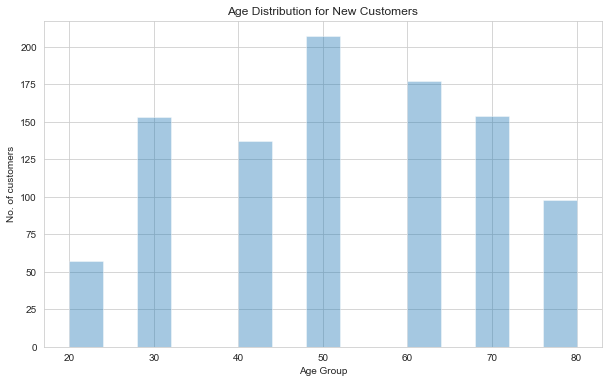

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.distplot(cncl.age_group,kde = False, bins = 15)
plt.title('Age Distribution for New Customers')
plt.ylabel('No. of customers')
plt.xlabel('Age Group')
plt.show()

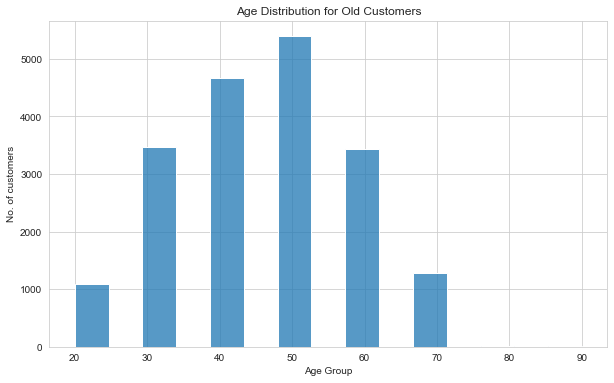

In [56]:
plt.figure(figsize = (10,6))
sns.histplot(trcd_rfm.Age_Group, bins = 15)
plt.title('Age Distribution for Old Customers')
plt.ylabel('No. of customers')
plt.xlabel('Age Group')
plt.show()

From the above two cells, most of the customers be it new or old are from age group 40-49. The age groups with least number of customers are under 20 for both old and new custumers. 

Among the New Customers the most populated age bracket is 20-29 and 50-59, while the maximum Old Customers are from the age bracket 20-39.

The plot for old customers looks a bit like normal distribution.

#### Purchases over last 3 years by gender

In [65]:
purchase_by_gender = trcd_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases': sum}).reset_index()

In [66]:
purchase_by_gender

,gender,past_3_years_bike_related_purchases
0,Female,478488
1,Male,468943


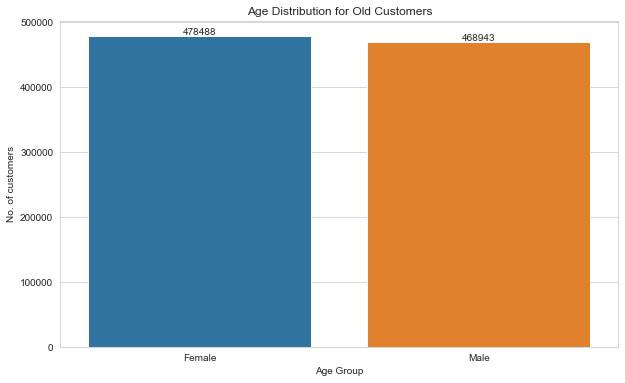

In [69]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'gender',y = 'past_3_years_bike_related_purchases',data = purchase_by_gender)
ax.bar_label(ax.containers[0])
plt.title('Purchases by Gender')
plt.ylabel('Total Bike Purchases')
plt.xlabel('Gender')
plt.show()

Females buy more bikes as they have approximately 10000 more bike purchases over the last three years.

#### Job industry Customer Distribution

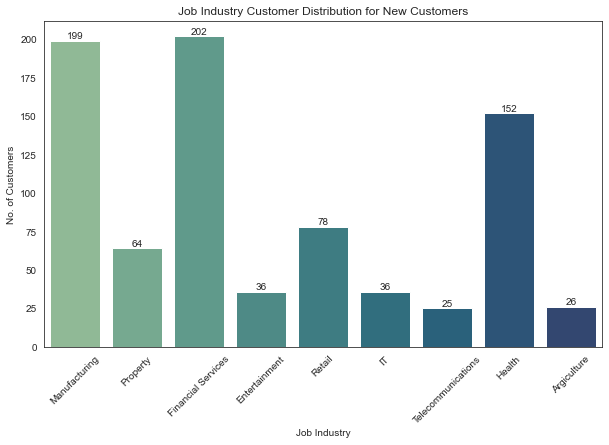

In [78]:
sns.set_style('white')
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'job_industry_category',data = cncl[cncl.job_industry_category != 'Unknown'], palette = 'crest')
ax.bar_label(ax.containers[0])
plt.title('Job Industry Customer Distribution for New Customers')
plt.ylabel('No. of Customers')
plt.xlabel('Job Industry')
plt.xticks(rotation = 45)
plt.show()

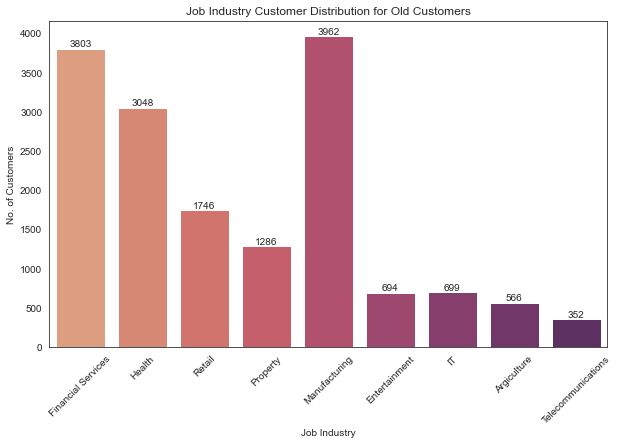

In [77]:
sns.set_style('white')
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'job_industry_category',data = trcd_rfm[trcd_rfm.job_industry_category != 'Not Provided'], palette = 'flare')
ax.bar_label(ax.containers[0])
plt.title('Job Industry Customer Distribution for Old Customers')
plt.ylabel('No. of Customers')
plt.xlabel('Job Industry')
plt.xticks(rotation = 45)
plt.show()

Among the New Customers the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. Similar trend is observed among Old Customers.

#### Wealth Segmentation by Age Group

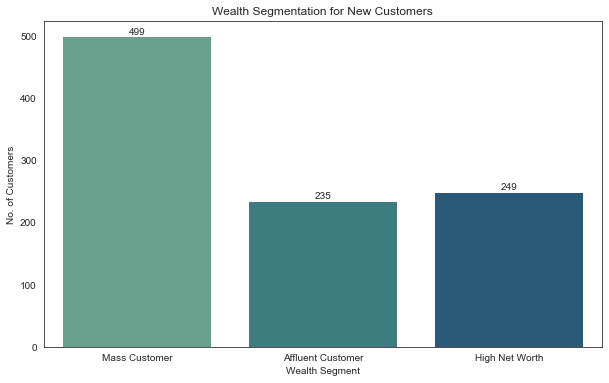

In [79]:
sns.set_style('white')
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'wealth_segment',data = cncl, palette = 'crest')
ax.bar_label(ax.containers[0])
plt.title('Wealth Segmentation for New Customers')
plt.ylabel('No. of Customers')
plt.xlabel('Wealth Segment')
plt.show()

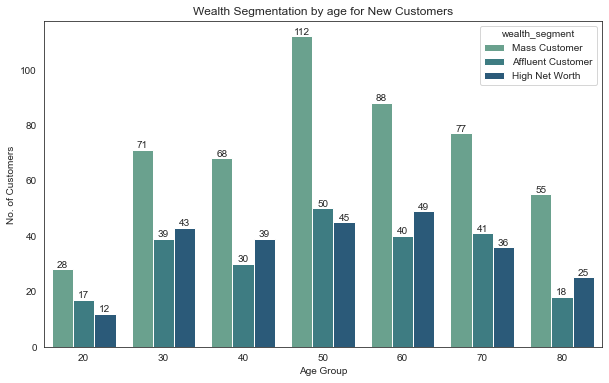

In [85]:
plt.figure(figsize = (10,6))
ax = sns.countplot(hue = 'wealth_segment',data = cncl, x = 'age_group', palette = 'crest')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Wealth Segmentation by age for New Customers')
plt.ylabel('No. of Customers')
plt.xlabel('Age Group')
plt.show()

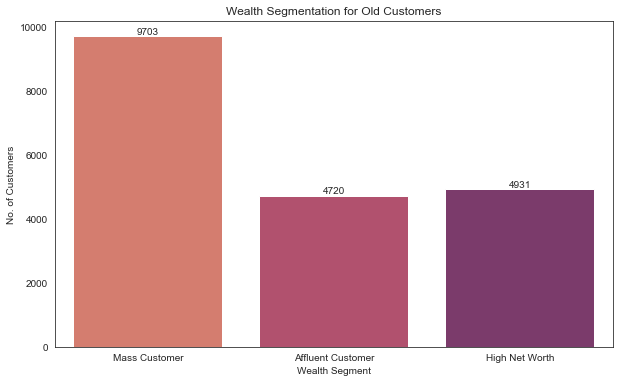

In [80]:
sns.set_style('white')
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'wealth_segment',data = trcd_rfm, palette = 'flare')
ax.bar_label(ax.containers[0])
plt.title('Wealth Segmentation for Old Customers')
plt.ylabel('No. of Customers')
plt.xlabel('Wealth Segment')
plt.show()

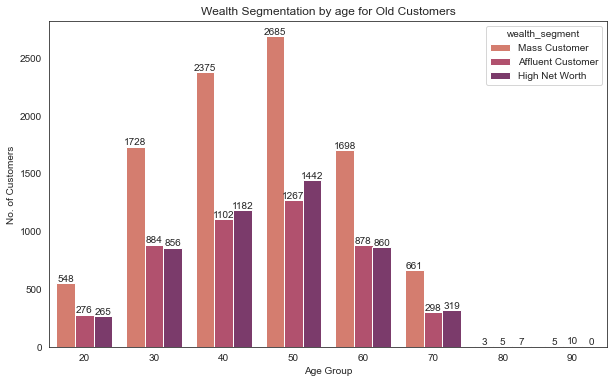

In [88]:
plt.figure(figsize = (10,6))
ax = sns.countplot(hue = 'wealth_segment',data = trcd_rfm, x = 'Age_Group', palette = 'flare')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Wealth Segmentation by age for Old Customers')
plt.ylabel('No. of Customers')
plt.xlabel('Age Group')
plt.show()

The Largest customer base is of mass customer for both old and new customers.

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group.

#### Car Owners across States

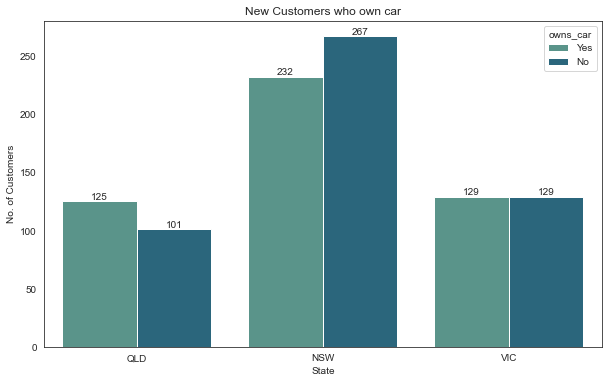

In [91]:
plt.figure(figsize = (10,6))
ax = sns.countplot(hue = 'owns_car',data = cncl, x = 'state', palette = 'crest')
for label in ax.containers:
    ax.bar_label(label)
plt.title('New Customers who own car')
plt.ylabel('No. of Customers')
plt.xlabel('State')
plt.show()

The final RFM data doesn't contain address data. Therefore, merging trcd_rfm and customer address sheet.

In [90]:
cust_adr = pd.merge(trcd_rfm, cca, how='inner',left_on='customer_id',right_on='customer_id' )

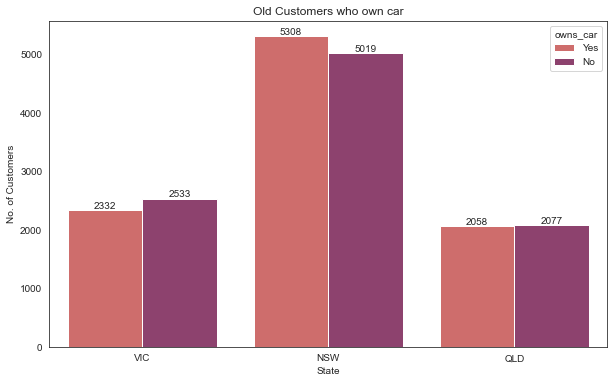

In [99]:
plt.figure(figsize = (10,6))
ax = sns.countplot(hue = 'owns_car',data = cust_adr, x = 'state', palette = 'flare')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Old Customers who own car')
plt.ylabel('No. of Customers')
plt.xlabel('State')
plt.show()

In [97]:
purchase_by_state = cust_adr.groupby('state').agg({'past_3_years_bike_related_purchases':sum}).reset_index()

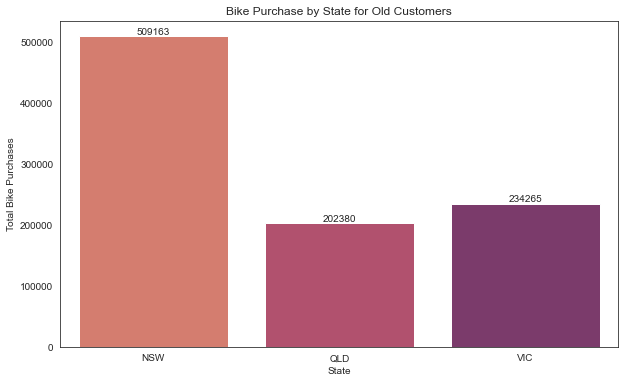

In [100]:
plt.figure(figsize = (10,6))
ax = sns.barplot(y = 'past_3_years_bike_related_purchases',data = purchase_by_state, x = 'state', palette = 'flare')
ax.bar_label(ax.containers[0])
plt.title('Bike Purchase by State for Old Customers')
plt.ylabel('Total Bike Purchases')
plt.xlabel('State')
plt.show()

NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states.

Bike Purchases are also high in NSW as many people don't own a car there.

### RFM Analysis Plots

#### Recency vs Monetary

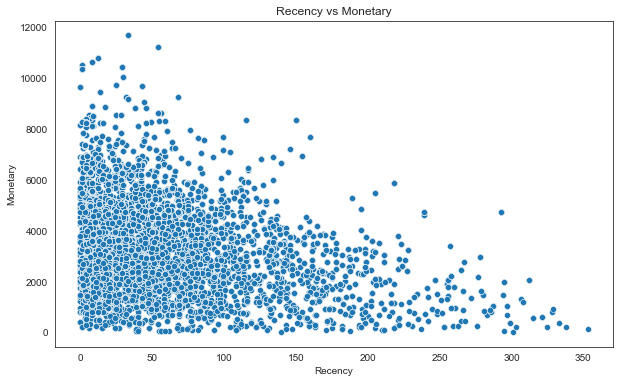

In [102]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'recency', y = 'monetary', data = trcd_rfm)
plt.title('Recency vs Monetary')
plt.ylabel('Monetary')
plt.xlabel('Recency')
plt.show()

The customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

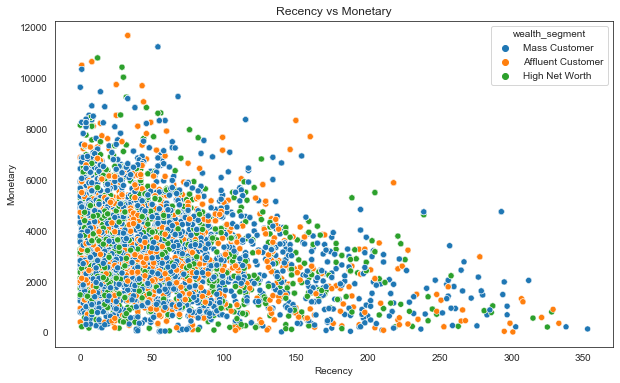

In [103]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'recency', y = 'monetary', data = trcd_rfm, hue = 'wealth_segment')
plt.title('Recency vs Monetary')
plt.ylabel('Monetary')
plt.xlabel('Recency')
plt.show()

#### Frequency vs Monetary

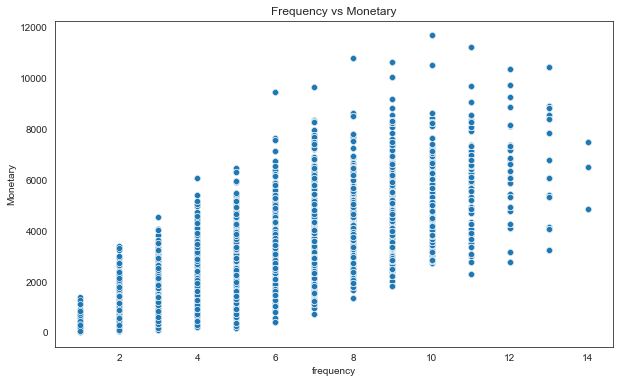

In [106]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'frequency', y = 'monetary', data = trcd_rfm)
plt.title('Frequency vs Monetary')
plt.ylabel('Monetary')
plt.xlabel('frequency')
plt.show()

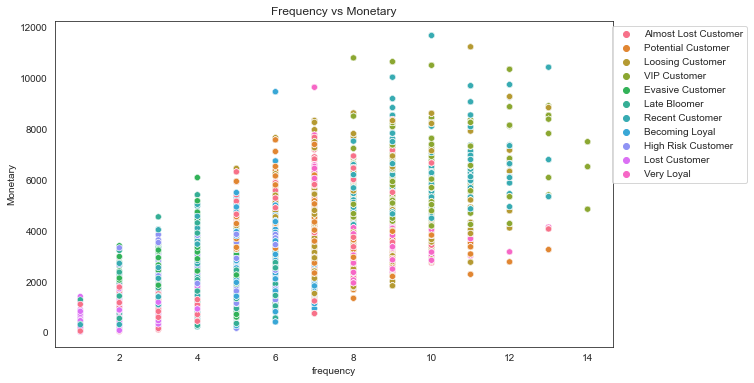

In [111]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'frequency', y = 'monetary', data = trcd_rfm, hue = 'detail_cust_title')
plt.title('Frequency vs Monetary')
plt.ylabel('Monetary')
plt.xlabel('frequency')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.show()

Customers classified as "VIP Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

### Customer Segment Distribution

In [116]:
cust_per_title = trcd_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [118]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
9,VIP Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
8,Recent Customer,4,357
7,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


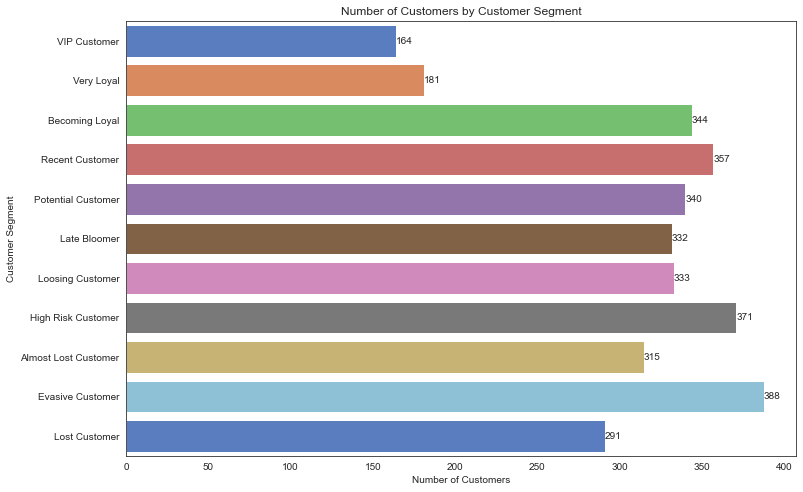

In [123]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y='detail_cust_title', x='Number of Customers', data=cust_per_title, palette = 'muted')
ax.bar_label(ax.containers[0])
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()